<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA 
</center></font>


<center><h2>Proyecto 1</h2></center>
<center><h3>Procesamiento digital de señales</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Felipe Gallardo</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>
 

In [98]:
from IPython.display import IFrame, display
filepath = "Proyecto_1_EIE401.pdf"
IFrame(filepath, width=700, height=400)

Debes usar el sitio https://gwosc.org/eventapi/html/GWTC/, donde encuentras todo el catálogo de observaciones con los datos en diferentes formatos. Debes seleccionar una detección para tu estudio y descargar los datos correspondientes (H5 o TXT), lo que posteriormente deberás tratar de manera digital como audio (serie de tiempo).
tip: Te recomiendo tomar la serie de tiempo corta (32 segundos) para facilitar el análisis, y asegurarte de tomar la tasa de muestreo más alta.
tip: Asegúrate de tomar un caso cuyo espectrograma de muestra, indique una señal clara y fuerte para facilitar tu trabajo, de otra forma es posible que no logres aislarla lo suficiente.


## 1. Carga de Datos


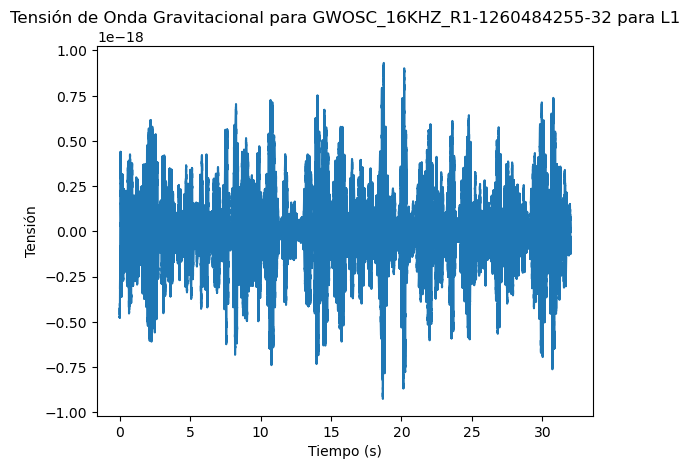

In [99]:
import numpy as np
from urllib.request import urlopen
import matplotlib.pyplot as plt

# URL del archivo .txt
url_txt = 'https://raw.githubusercontent.com/Soldatwar/EIE-401_Gallardo_Felipe_Actividades/main/Ptoyecto_1/L-L1_GWOSC_16KHZ_R1-1260484255-32.txt'
# Carga de archivos
arch_txt = np.genfromtxt(urlopen(url_txt), skip_header=3)

# Asumiendo una frecuencia de muestreo
fs = 16384  # por ejemplo, 16 kHz
# Creando el vector de tiempo
t = np.arange(len(arch_txt)) / fs

# Gráfica del archivo .txt
plt.plot(t, arch_txt)
plt.title('Tensión de Onda Gravitacional para GWOSC_16KHZ_R1-1260484255-32 para L1')
plt.xlabel('Tiempo (s)')
plt.ylabel('Tensión')

plt.show()

## 2. Convertir en audio
Es una forma de validar que tenemos un alto componente de ruido en la señal y que el interés es eliminarlo para encontrar una señal candidata.

Te recomiendo hacer una señal de audio de cada uno de las etapas para así validar como va el proceso. Al final deberás obtener un señal con CHIRP o BUMP. Son sonidos que comprueban que tienes una cantidad de potencia que sobre destaca sobre el ruido.

In [100]:
"""
Convertir a audio
"""
from scipy.io import wavfile

# Normalizado de datos
#normalized_data = np.float32(arch_txt / np.max(np.abs(arch_txt)))

normalizado = np.float32((arch_txt - np.mean(arch_txt)) / np.std(arch_txt))
#normalizado = np.float32(arch_txt / np.max(arch_txt))

# Ffrecuencia de muestreo
frecuencia = 16384 

# Escribe los datos en un archivo .wav
wavfile.write('C:\\Users\\ffgal\\OneDrive\\Documentos\\Proyecto 1\\archivo1.wav', frecuencia, normalizado)


## 3. Análisis de Fourier
Al realizar la conversión, queremos ver cuales son las componentes de ruido que más afectan al instrumento y debemos ignorar en el análisis. Eso se ve como "pico" o la apariencia de "peine".
Se debe presenta la densidad espectral de potencia antes y después de la función de Windowing.


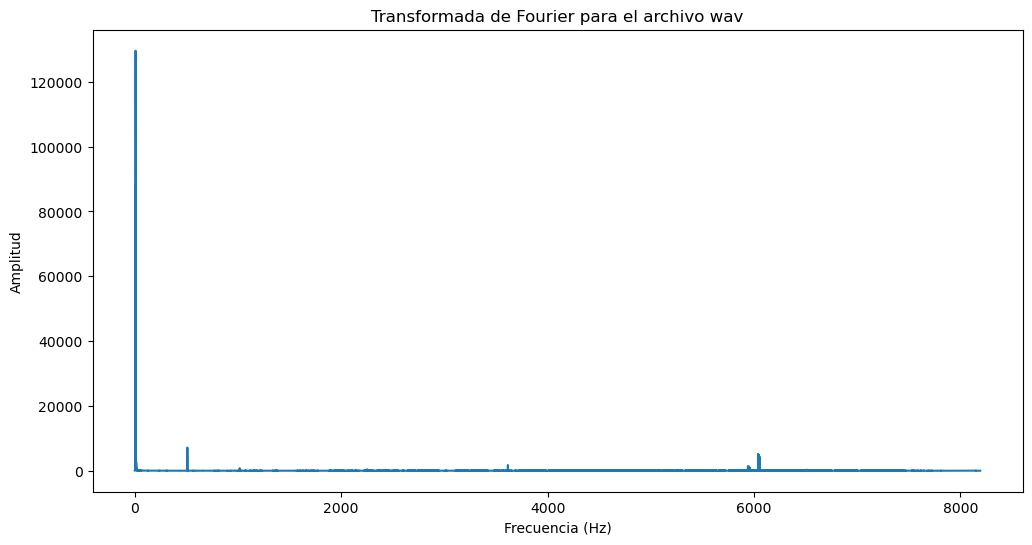

In [101]:
"""
Transformada de fourier archivo .wav normalizado
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Lee el archivo wav
fs1, data1= wavfile.read('C:\\Users\\ffgal\\OneDrive\\Documentos\\Proyecto 1\\archivo.wav')

# Si el audio es estéreo (2 canales) toma solo un canal
if len(data1.shape) > 1:
    data1 = data1[:, 0]

# Aplica la Transformada de Fourier
transformada1 = np.fft.fft(data1)

# Crea un array de frecuencias y ajusta la escala con la tasa de muestreo
frecuencias1 = np.fft.fftfreq(len(data1), 1/fs) 

# Solo toma la mitad positiva del espectro
mask = frecuencias1> 0

# Gráfica de la Transformada de Fourier
plt.figure(figsize=(12, 6))
plt.plot(frecuencias1[mask], np.abs(transformada1[mask]))
plt.title('Transformada de Fourier para el archivo wav')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.show()

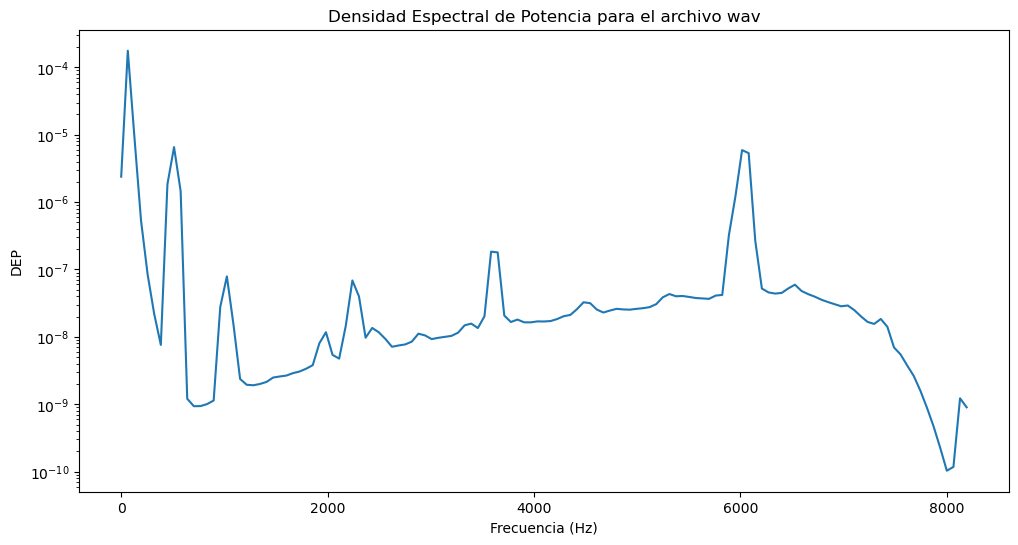

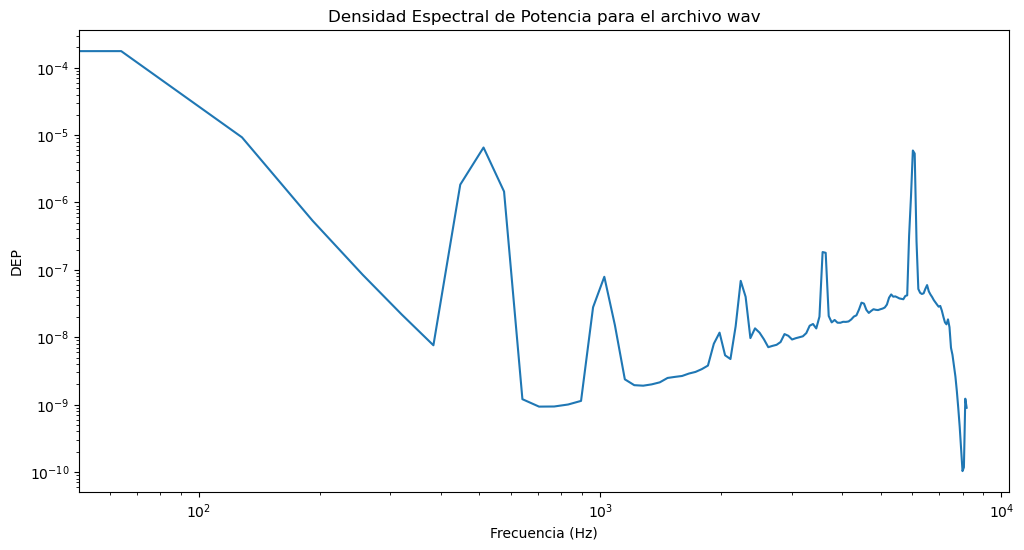

In [102]:
"""
Densidad espectral para el archivo .wav normalizado
"""
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import welch

# Lee el archivo wav
fs, data = wavfile.read('C:\\Users\\ffgal\\OneDrive\\Documentos\\Proyecto 1\\archivo.wav')

# Si el audio es estéreo (2 canales) toma solo un canal
if len(data5.shape) > 1:
    data5 = data5[:, 0]

# Normaliza los datos
data_norm = (data5 - np.mean(data5)) / np.std(data5)

# Calcula la densidad espectral de potencia
frecuencias5, DEP5 = welch(data5_norm, fs=fs)

# Gráfica de la densidad espectral de potencia
plt.figure(figsize=(12, 6))
plt.semilogy(frecuencias5, DEP5)
plt.title('Densidad Espectral de Potencia para el archivo wav')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('DEP')

# Gráfica de la densidad espectral de potencia en escala logaritmica
plt.figure(figsize=(12, 6))
plt.semilogy(frecuencias5, DEP5)
plt.xscale('log')  # Escala logarítmica en el eje x
plt.title('Densidad Espectral de Potencia para el archivo wav')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('DEP')

plt.show()

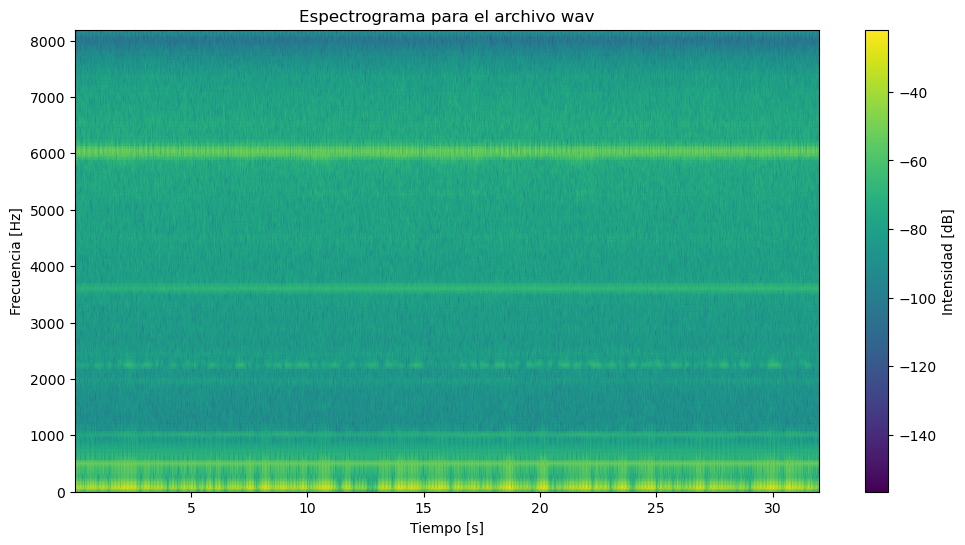

In [103]:
from scipy.signal import spectrogram

# Calcula el espectrograma de los datos
frecuencias, tiempos, Sxx = spectrogram(data_norm, fs=fs)

# Gráfica del espectrograma
plt.figure(figsize=(12, 6))
plt.pcolormesh(tiempos, frecuencias, 10 * np.log10(Sxx), shading='gouraud')
plt.colorbar(label='Intensidad [dB]')
plt.title('Espectrograma para el archivo wav')
plt.xlabel('Tiempo [s]')
plt.ylabel('Frecuencia [Hz]')
plt.show()

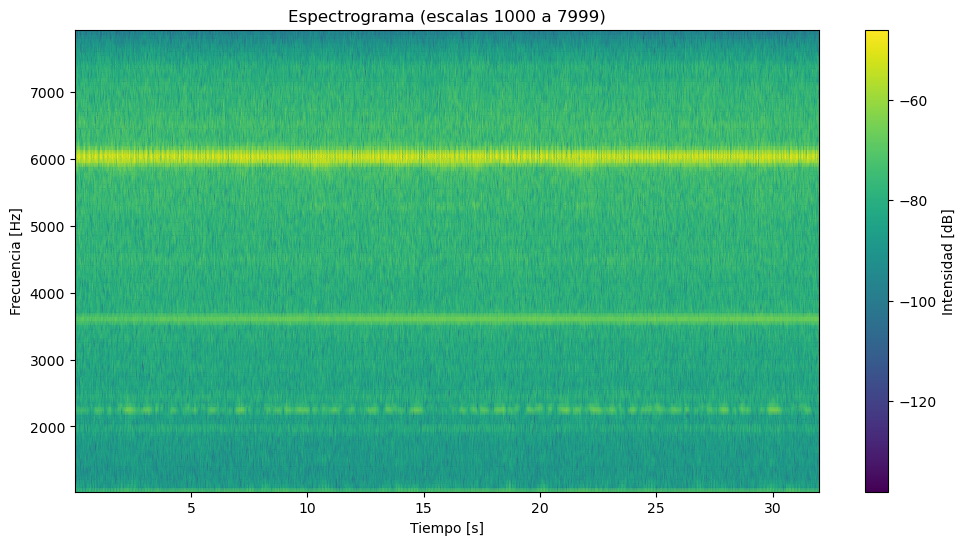

In [97]:
"""
Espectrograma con rangos configurables para pruebas
"""
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

# Asumiendo que 'data_norm' es tu señal de audio y 'fs' es la frecuencia de muestreo
# Calcular el espectrograma de los datos
frecuencias, tiempos, Sxx = spectrogram(data_norm, fs=fs)

# Definir los rangos de escalas (en este caso, son las frecuencias)
rango_escalas = [np.arange(1000, 8000)]

# Para cada rango de escalas
for escalas in rango_escalas:
    # Seleccionar las frecuencias dentro del rango de escalas
    indices = np.where((frecuencias >= escalas[0]) & (frecuencias <= escalas[-1]))

    # Comprobar si hay frecuencias dentro del rango de escalas
    if len(indices[0]) > 0:
        # Calcular la densidad espectral de potencia para el rango de escalas
        Sxx_escalas = Sxx[indices]

        # Convertir a decibelios
        Sxx_db = 10 * np.log10(Sxx_escalas)

        # Graficar el espectrograma
        plt.figure(figsize=(12, 6))
        plt.pcolormesh(tiempos, frecuencias[indices], Sxx_db, shading='gouraud')
        plt.colorbar(label='Intensidad [dB]')
        plt.title(f'Espectrograma (escalas {escalas[0]} a {escalas[-1]})')
        plt.xlabel('Tiempo [s]')
        plt.ylabel('Frecuencia [Hz]')
        plt.show()
    else:
        print(f"No hay frecuencias en el rango {escalas[0]} a {escalas[-1]}")

## 4. Procesamiento 
Debes inferir de tu estudio, cual es el proceso que aplican a la señal y reproducirlo. Es posible que cada estudiante llegue a una solución más o menos diferente, pues no hay un código abierto donde esté el procedimiento completo.


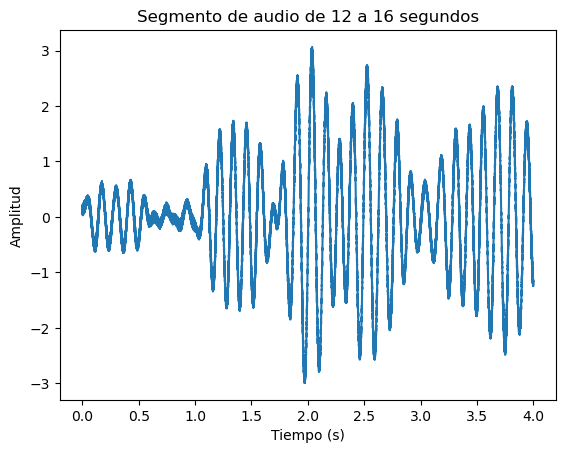

In [104]:
"""
Selecionando un rango acotado de tiempo para el analisis
"""
from IPython.display import Audio

# Calcular los índices de inicio y fin
inicio = int(12 * fs)  # 12 segundos * frecuencia de muestreo
fin = int(16 * fs)  # 16 segundos * frecuencia de muestreo

# Seleccionar el segmento de audio
segmento = data_norm[inicio:fin]

# Crear el vector de tiempo
t2 = np.arange(len(segmento)) / fs

# Gráfica del segmento de audio
plt.plot(t2, segmento)
plt.title('Segmento de audio de 12 a 16 segundos')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')

plt.show()

# Reproducir el audio filtrado
Audio(segmento, rate=fs)

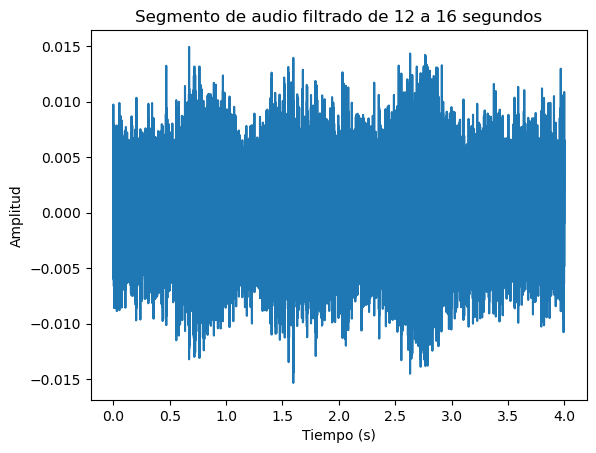

In [106]:
from scipy.signal import butter, filtfilt

# Definir las frecuencias de corte (en Hz)
lowcut = 1000.0
highcut = 2500.0

# Diseñar el filtro de paso de banda
nyquist = 0.5 * fs
low = lowcut / nyquist
high = highcut / nyquist
b, a = butter(5, [low, high], btype='band')

# Aplicar el filtro a la señal
filtro = filtfilt(b, a, segmento)

# Gráfica de la señal filtrada
plt.plot(t2, filtro)
plt.title('Segmento de audio filtrado de 12 a 16 segundos')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.show()


# Reproducir el audio filtrado
Audio(filtro, rate=fs)

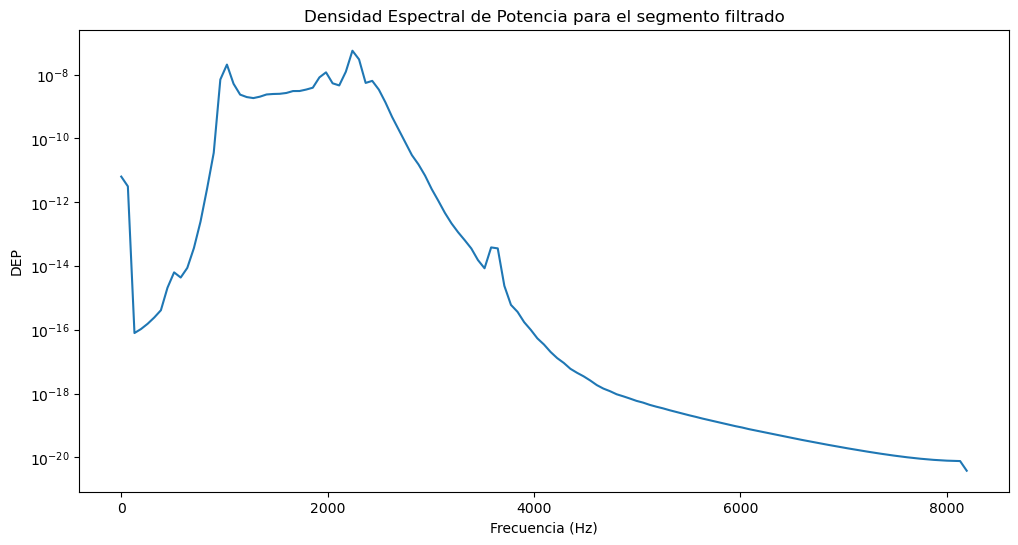

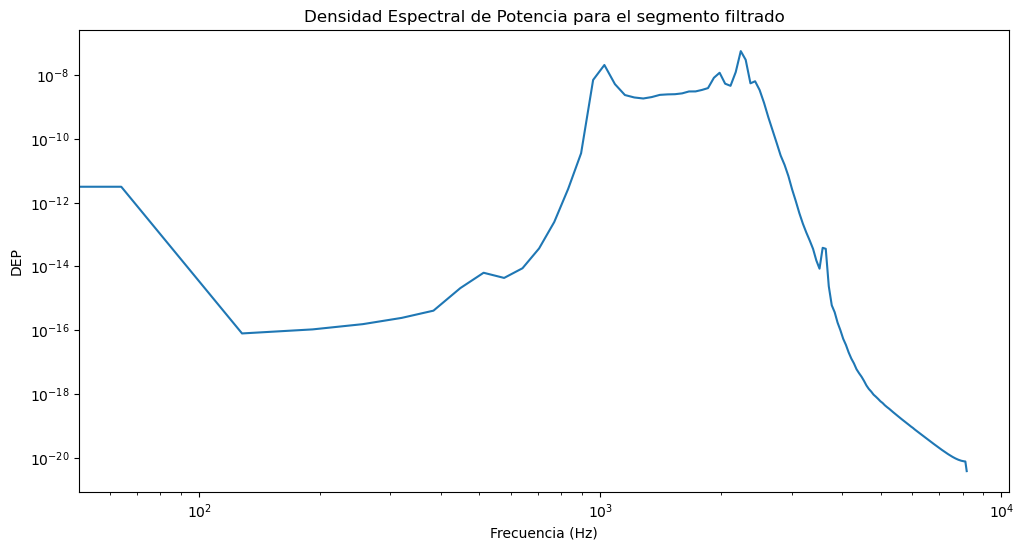

In [107]:
# Calcula la densidad espectral de potencia para el segmento filtrado
frecuencias, DEP = welch(filtro, fs=fs)

# Gráfica de la densidad espectral de potencia
plt.figure(figsize=(12, 6))
plt.semilogy(frecuencias, DEP)
plt.title('Densidad Espectral de Potencia para el segmento filtrado')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('DEP')

# Gráfica de la densidad espectral de potencia en escala logaritmica
plt.figure(figsize=(12, 6))
plt.semilogy(frecuencias, DEP)
plt.xscale('log')  # Escala logarítmica en el eje x
plt.title('Densidad Espectral de Potencia para el segmento filtrado')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('DEP')

plt.show()

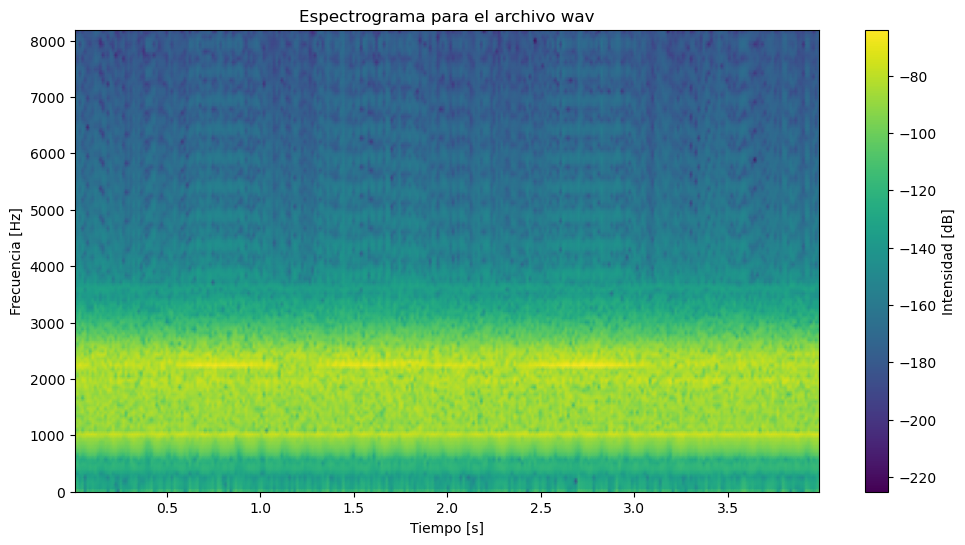

In [108]:
# Calcula el espectrograma de los datos
frecuencias, tiempos, Sxx = spectrogram(filtro, fs=fs)

# Gráfica del espectrograma
plt.figure(figsize=(12, 6))
plt.pcolormesh(tiempos, frecuencias, 10 * np.log10(Sxx), shading='gouraud')
plt.colorbar(label='Intensidad [dB]')
plt.title('Espectrograma para el archivo wav')
plt.xlabel('Tiempo [s]')
plt.ylabel('Frecuencia [Hz]')
plt.show()

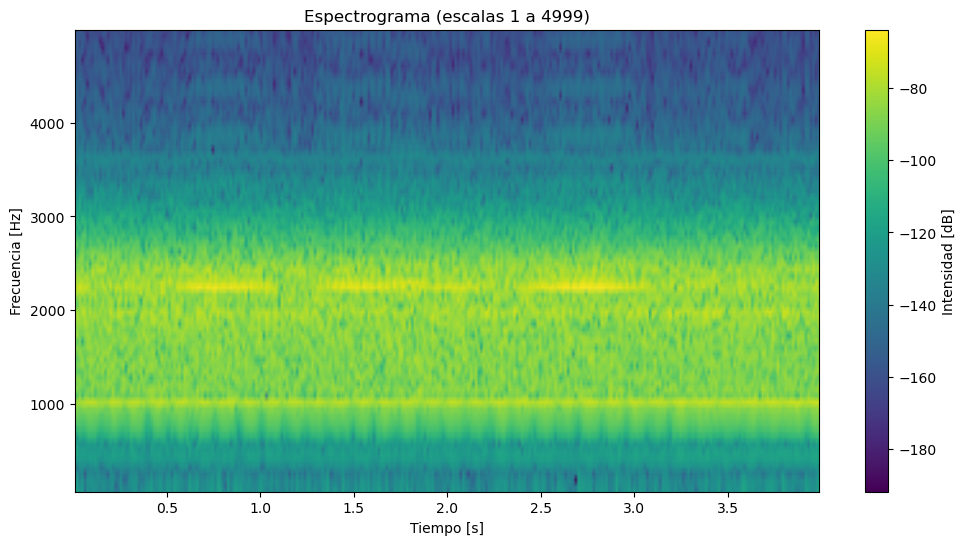

In [110]:
"""
Espectrograma con rangos configurables para pruebas
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

# Asumiendo que 'data_norm' es tu señal de audio y 'fs' es la frecuencia de muestreo
# Calcular el espectrograma de los datos
frecuencias, tiempos, Sxx = spectrogram(filtro, fs=fs)

# Definir los rangos de escalas (en este caso, son las frecuencias)
rango_escalas = [np.arange(1, 5000)]

# Para cada rango de escalas
for escalas in rango_escalas:
    # Seleccionar las frecuencias dentro del rango de escalas
    indices = np.where((frecuencias >= escalas[0]) & (frecuencias <= escalas[-1]))

    # Comprobar si hay frecuencias dentro del rango de escalas
    if len(indices[0]) > 0:
        # Calcular la densidad espectral de potencia para el rango de escalas
        Sxx_escalas = Sxx[indices]

        # Convertir a decibelios
        Sxx_db = 10 * np.log10(Sxx_escalas)

        # Graficar el espectrograma
        plt.figure(figsize=(12, 6))
        plt.pcolormesh(tiempos, frecuencias[indices], Sxx_db, shading='gouraud')
        plt.colorbar(label='Intensidad [dB]')
        plt.title(f'Espectrograma (escalas {escalas[0]} a {escalas[-1]})')
        plt.xlabel('Tiempo [s]')
        plt.ylabel('Frecuencia [Hz]')
        plt.show()
    else:
        print(f"No hay frecuencias en el rango {escalas[0]} a {escalas[-1]}")

# Resampling
Para lograr una mejor definición de la señal, se debe hacer un resampleo. Esto tienen consecuencias por eso debe elegirse bien la frecuencia de tal forma que no se introduzca ruido.

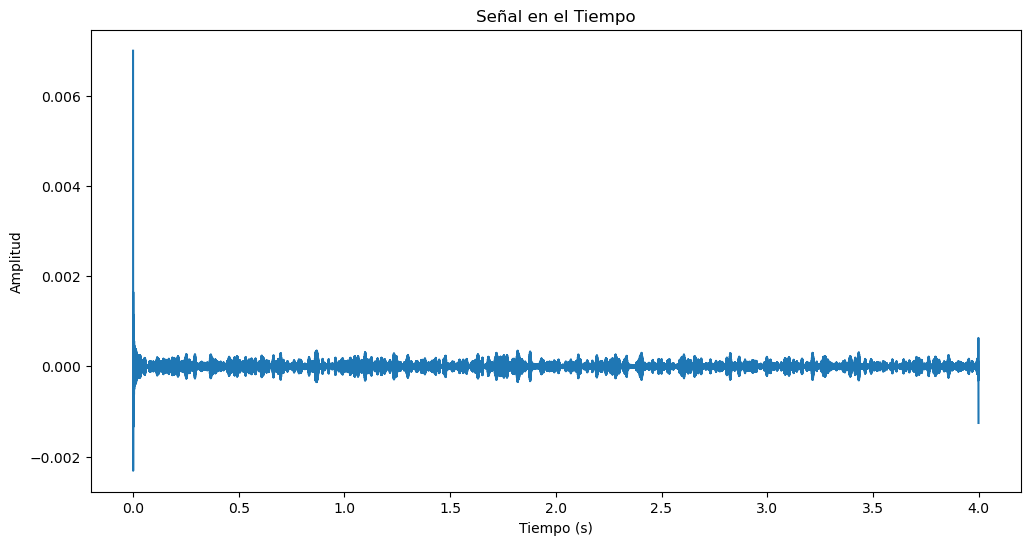

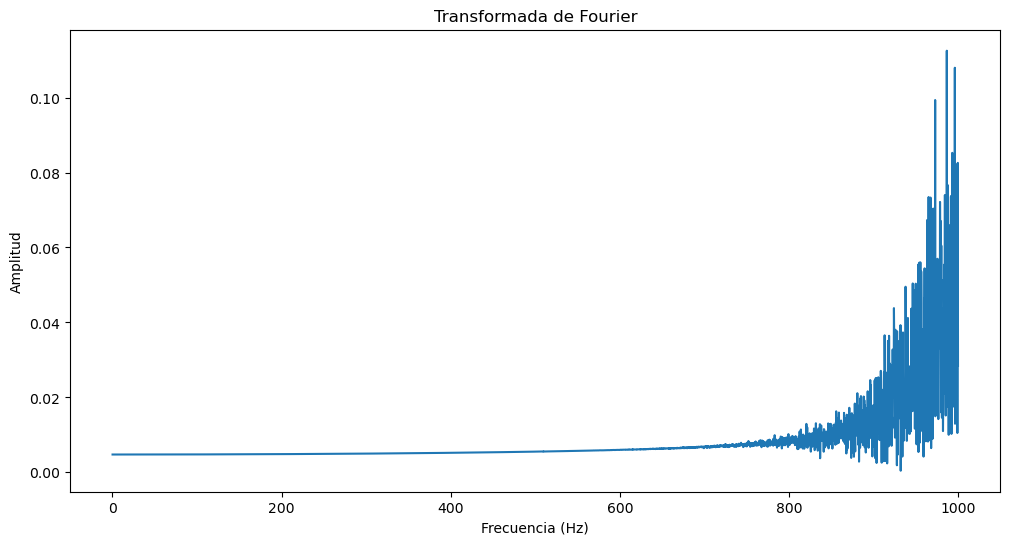

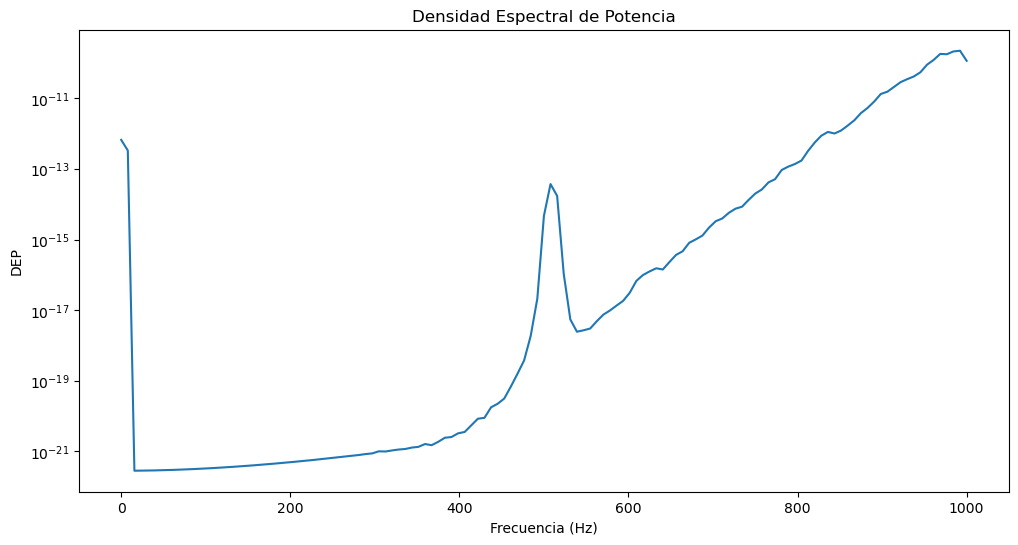

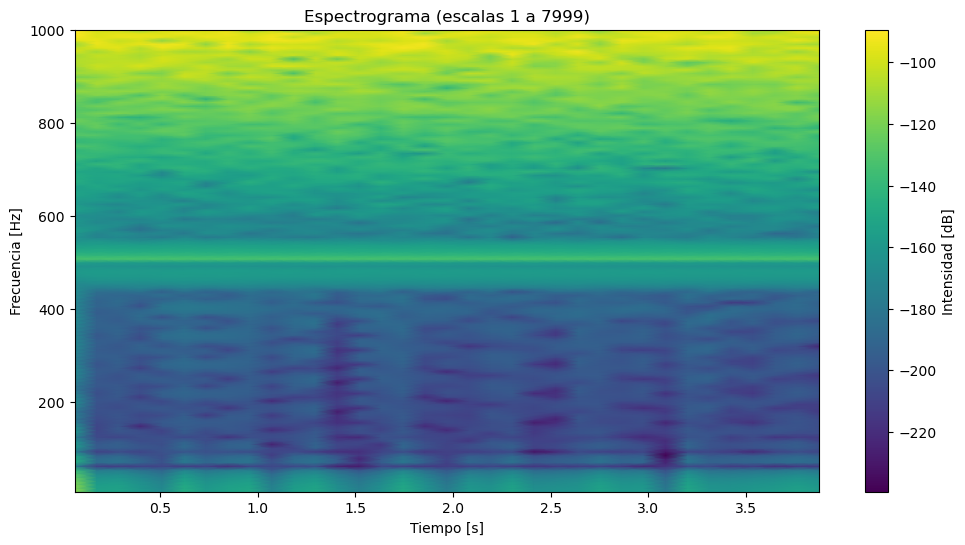

In [113]:
import numpy as np
from scipy.signal import resample, welch, spectrogram
import matplotlib.pyplot as plt

# Realiza el resampling
nueva_frecuencia = 2000 # Nueva frecuencia de muestreo
num_puntos = int(len(filtro) * nueva_frecuencia / fs)  # Número de puntos en la nueva señal
data_resampled = resample(filtro, num_puntos)  # Resampling

t3 = np.arange(len(data_resampled)) / nueva_frecuencia

# Gráfica de la señal en el tiempo
plt.figure(figsize=(12, 6))
plt.plot(t3, data_resampled)
plt.title('Señal en el Tiempo')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.show()

# Gráfica de la Transformada de Fourier
transformada = np.fft.fft(data_resampled)
frecuencias = np.fft.fftfreq(len(data_resampled), 1/nueva_frecuencia) 
mask = frecuencias > 0
plt.figure(figsize=(12, 6))
plt.plot(frecuencias[mask], np.abs(transformada[mask]))
plt.title('Transformada de Fourier')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.show()

# Gráfica de la Densidad Espectral de Potencia (DEP)
frecuencias, DEP = welch(data_resampled, fs=nueva_frecuencia)
plt.figure(figsize=(12, 6))
plt.semilogy(frecuencias, DEP)
plt.title('Densidad Espectral de Potencia')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('DEP')
plt.show()

"""
# Espectrograma
frecuencias, tiempos, Sxx = spectrogram(data_resampled, fs=nueva_frecuencia)
plt.figure(figsize=(12, 6))
plt.pcolormesh(tiempos, frecuencias, 10 * np.log10(Sxx), shading='gouraud')
plt.colorbar(label='Intensidad [dB]')
plt.title('Espectrograma')
plt.xlabel('Tiempo [s]')
plt.ylabel('Frecuencia [Hz]')
plt.show()
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

# Asumiendo que 'data_norm' es tu señal de audio y 'fs' es la frecuencia de muestreo
# Calcular el espectrograma de los datos
frecuencias, tiempos, Sxx = spectrogram(data_resampled, fs=nueva_frecuencia)

# Definir los rangos de escalas (en este caso, son las frecuencias)
rango_escalas = [np.arange(1, 8000)]

# Para cada rango de escalas
for escalas in rango_escalas:
    # Seleccionar las frecuencias dentro del rango de escalas
    indices = np.where((frecuencias >= escalas[0]) & (frecuencias <= escalas[-1]))

    # Comprobar si hay frecuencias dentro del rango de escalas
    if len(indices[0]) > 0:
        # Calcular la densidad espectral de potencia para el rango de escalas
        Sxx_escalas = Sxx[indices]

        # Convertir a decibelios
        Sxx_db = 10 * np.log10(Sxx_escalas)

        # Graficar el espectrograma
        plt.figure(figsize=(12, 6))
        plt.pcolormesh(tiempos, frecuencias[indices], Sxx_db, shading='gouraud')
        plt.colorbar(label='Intensidad [dB]')
        plt.title(f'Espectrograma (escalas {escalas[0]} a {escalas[-1]})')
        plt.xlabel('Tiempo [s]')
        plt.ylabel('Frecuencia [Hz]')
        plt.show()
    else:
        print(f"No hay frecuencias en el rango {escalas[0]} a {escalas[-1]}")


https://iopscience.iop.org/article/10.1088/1361-6382/ab685e